# Life Expectancy Analysis & Modeling Using WHO, UN data

## Correlation & How To Drop Highly Correlated Features

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2023-01-29

Re:&nbsp;&nbsp;&nbsp; 

---

## Executive Summary

This Python notebook describes a method to reduce correlation among variables in a dataset. Datasets with high collinearity (collinear is closely related to correlation) can cause problems when modeling systems.

1. When two features have a correlation of >= 0.75, one feature may tested and dropped to reduce modeling issues.   
   
2. In order to determine which ones to remove, we will compare the correlations after each removal.

3. For the Life_Expectancy dataset, it was found that `Thin5_9y`, `InfD` may be deleted given their high correlations.

## Introduction

This file (function) utilizes:

- Input: Clean_LE_Data_w_Means_1_.csv

- Output: Clean_LE_Data_Post_Correlation_2.csv

### What problems can occur when highly correlated variables are used in data modeling?

When highly correlated variables are used in predictive models, it can lead to a number of problems:

1. **Overfitting**: When highly correlated variables are used in a model, the model may become too complex and overfit the training data.

2. **Multicollinearity**: When variables are so highly correlated that they provide redundant information to the model. This can make it difficult to accurately estimate the coefficients of the variables and can also lead to unstable parameter estimates.

3. **Inflated standard errors**: Highly correlated variables can lead to inflated standard errors, which can make it difficult to accurately estimate the uncertainty associated with the model's parameters.
   
4. **Reduced interpretability**: Highly correlated variables can make it difficult to interpret the effects of individual variables on the outcome variable.

5. **Multicollinearity**: When variables are so highly correlated that they provide redundant information to the model. This can make it difficult to accurately estimate the coefficients of the variables and can also lead to unstable parameter estimates.

6. **Difficulty in variable selection**: When multiple highly correlated variables are present, it can be difficult to determine which variables are important for the model and which can be eliminated without negatively impacting the model's performance.


## Highly Correlated Features

The *WHO Life Expecteancy: IDA_EDA_Report* found six variables were highly correlated.

| Variables | Correlation |
|:----------|------------:|
| (InfD) Infant Death & (lt5yD) Number of less than 5yr deaths | 0.997 |
| Thinness at 1-19yr & Thinness at 5-9yr | 0.939 |
| Perc_Expen & GDP | 0.899 |

- In order to determine which ones to remove, we will compare the correlations after each removal.

- It is reccommened that removing descriptors with absolute correlations above 0.75 is done by a 'bake-off' method, for reference, see [Max Kuhn](https://topepo.github.io/caret/pre-processing.html#identifying-correlated-predictors)

https://topepo.github.io/caret/pre-processing.html#identifying-correlated-predictors

---



### Compare Correlation coeff of (InfD) Infant Death Vs. (lt5yD) Number of less than 5yr deaths 

In [1]:
# Common Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.express as px
import seaborn as sns

In [2]:
path = '../data/processed/'
filename = 'Clean_LE_Data_w_Means_1.csv'

df = pd.read_csv(path+filename,header=0)

print(f'\nFile "{filename}" has ',
      df.shape[0], 'observations &', df.shape[1], 'features.\n')


File "Clean_LE_Data_w_Means_1.csv" has  2928 observations & 19 features.



## Check Correlations Of Numeric Variables

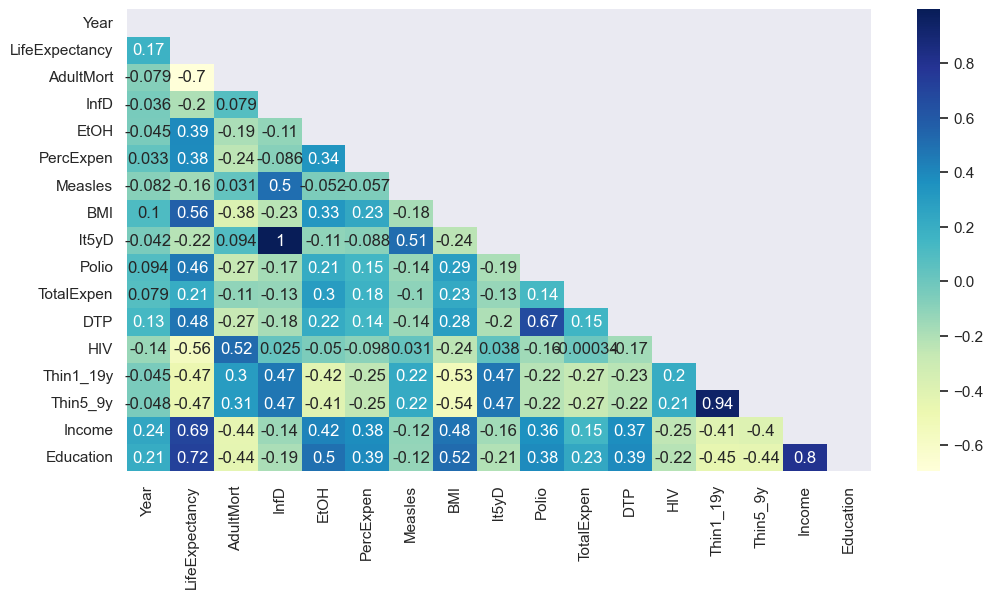

In [4]:
# Compute pairwise correlation of columns, excluding NA/null values.
# numeric_onlybool, default True, Include only float, int or boolean data.
df_mod = df.drop(['Status', 'Country'], axis=1, inplace=False)

# creating triangular mask
mask = np.triu(np.ones_like(df_mod.corr()))
 
# plotting a triangle correlation heatmap
sns.set(rc={"figure.figsize":(12, 6)}) #width=3, #height=4
dataplot = sns.heatmap(df_mod.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [5]:
# Generate Corr Coeff for InfD vs LifeExpectancy

np.corrcoef(df['InfD'], df['LifeExpectancy'])

array([[ 1.        , -0.19655718],
       [-0.19655718,  1.        ]])

In [6]:
# Generate Corr Coeff for lt5yD vs LifeExpectancy

np.corrcoef(df['lt5yD'], df['LifeExpectancy'])

array([[ 1.        , -0.22252912],
       [-0.22252912,  1.        ]])

### NOTE 5:

- The correlation of `lt5yd` = -0.22252912

- The correlation of `InfD` = -0.19655718

- Therefore DELETE `InfD`

### Compare Correlation coeff of (Thin1_19y) Thinness at 1-19yr & (Thin5_9y) Thinness at 5-9yr

In [7]:
np.corrcoef(df['Thin1_19y'], df['LifeExpectancy'])

array([[ 1.        , -0.47277841],
       [-0.47277841,  1.        ]])

In [8]:
np.corrcoef(df['Thin5_9y'], df['LifeExpectancy'])

array([[ 1.        , -0.46723051],
       [-0.46723051,  1.        ]])

### NOTE 6:
- The correlation of `Thin1_19y` = -0.47277841

- The correlation of `Thin5_9y` = -0.46723051

- Therefore DELETE `Thin5_9y`

In [9]:
# Drop TWO Features

df.drop(['Thin5_9y', 'InfD'], axis=1, inplace=True)

In [10]:
## Save Intermediate dataframe
path = '../data/processed/'
fileName = 'Clean_LE_Data_Post_Correlation_2.csv'

df.to_csv(path+fileName, index=False)